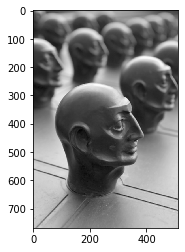

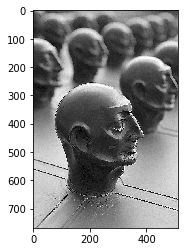

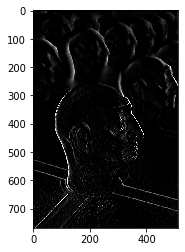

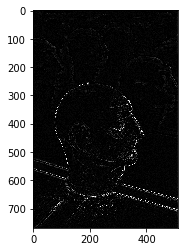

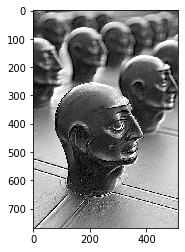

In [18]:
# https://en.wikipedia.org/wiki/Convolutional_neural_network
import time
import skimage
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float32
import sys
import matplotlib.image as mpimg
from skimage import color
import cv2

indentity = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]])

blur = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]])

sharpen = np.array([
  [0,-1,0],
  [-1,5,-1],
  [0,-1,0]])

emboss = np.array([
  [-2,-1,0],
  [-1,1,1],
  [0,1,2]])

left_sobel = np.array([
  [1,0,-1],
  [2,0,-2],
  [1,0,-1]])

outline = np.array([
  [-1,-1,-1],
  [-1,8,-1],
  [-1,-1,-1]])

def imfilter2(A,kernel):
  (mi,ni) = A.shape
  (mk,nk) = kernel.shape
  Z = np.zeros((mi+mk,ni+nk))
  tmp = np.zeros((mi,ni))
  for i in range(mi):
    for j in range(ni):
      Z[i+mk//2][j+nk//2]=A[i][j]
  for i in range(mi):
    for j in range(ni):
      acc=0
      for k in range(mk):
        for l in range(nk):
          acc+=(Z[i+k][j+l]*kernel[k][l])
      if(acc<0): acc=0
      if(acc>255): acc=255
      tmp[i][j]=acc
  for i in range(mi):
    for j in range(ni):
      A[i][j]=tmp[i][j]
  return A

def imfilter(A,kernel): 
  if kernel.shape[0]%2==0 or kernel.shape[1]%2==0 : 
    print("Error: Invalid kernel dimensions. Quitting...")
    return A
  if(len(A.shape)==2): 
    imfilter2(A,kernel)
  if(len(A.shape)>2): 
    for i in range(A.shape[2]):
      A[:,:,i] = imfilter2(A[:,:,i],kernel)
  return A

def main():
  for KERNEL in [blur, sharpen, left_sobel, outline, emboss]:
    A = cv2.imread("pics/heads.png")   # for not color?
    #A = io.imread("pics/heads.png")  # for color?
    B = imfilter(A,KERNEL)
    io.imsave("out.png",B)
    plt.imshow(B)
    plt.show()

main()




In [2]:
import numpy as np
import math

def gauss(r, c, sigma):
  k=np.zeros((r,c))
  rows,cols=r,c
  s=2.0*sigma*sigma
  cr=r//2
  cc=c//2
  sum=0.0
  for i in range(-cr,cr+1):
    for j in range(-cc,cc+1):
      r=math.sqrt(i*i+j*j)
      k[i+cr][j+cc]=math.exp(-r*r/s)/(math.pi*s) 
      sum+=k[i+cr][j+cc]
  for i in range(rows):
    for j in range(cols):
      k[i][j]/=sum
  return k


In [3]:
import time
import skimage
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float32
import sys
import matplotlib.image as mpimg
from skimage import color
import cv2

def imfilter2(A,kernel):
  (mi,ni) = A.shape
  (mk,nk) = kernel.shape
  Z = np.zeros((mi+mk,ni+nk))
  tmp = np.zeros((mi,ni))
  for i in range(mi):
    for j in range(ni):
      Z[i+mk//2][j+nk//2]=A[i][j]
  for i in range(mi):
    for j in range(ni):
      acc=0
      for k in range(mk):
        for l in range(nk):
          acc+=(Z[i+k][j+l]*kernel[k][l])
      if(acc<0): acc=0
      if(acc>255): acc=255
      tmp[i][j]=acc
  for i in range(mi):
    for j in range(ni):
      A[i][j]=tmp[i][j]
  return A

def imfilter(A,kernel): 
  if kernel.shape[0]%2==0 or kernel.shape[1]%2==0 : 
    print("Error: Invalid kernel dimensions. Quitting...")
    return A
  if(len(A.shape)==2): 
    imfilter2(A,kernel)
  if(len(A.shape)>2): 
    for i in range(A.shape[2]):
      A[:,:,i] = imfilter2(A[:,:,i],kernel)
  return A



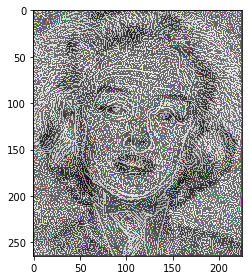

In [13]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy import misc
from scipy import ndimage
import math
from skimage import io
import sys

from gaussian import gauss
from imfilter import imfilter
import cv2

def hybrid(F1,F2,sigH,sigL):
  A = io.imread(F1)   # for not color?
  B = io.imread(F2)   # for not color?
  l=imfilter(A, gauss(3,3,sigH))
  h=imfilter(B, gauss(3,3,sigL))
  A = io.imread(F1)
  l = A-l
  for i in range(h.shape[0]):
    for j in range(h.shape[1]):
      for k in range(h.shape[2]):
        h[i][j][k] = h[i][j][k]/2
        l[i][j][k] = l[i][j][k]/2
  return (l + h)

def main():
  hyb = hybrid("pics/data/einstein.bmp","pics/data/marilyn.bmp",1.0,1.0)
  io.imshow(hyb)
  io.show()
  io.imsave("out.png",hyb)
main()



